In [20]:
!pip install textblob 

In [61]:
!python -m spacy download en_core_web_sm

2021-04-09 12:39:22.473208: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-09 12:39:22.475043: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [21]:
import pandas as pd
import numpy as np 
import spacy
import string 
import nltk
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt 
from wordcloud import wordcloud
%matplotlib inline
import re
from textblob import TextBlob


In [16]:
tweet=pd.read_csv("C:\\Users\\Admin\\Downloads\\Elon_musk.csv",error_bad_lines=False,encoding="latin-1")
tweet.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [10]:
tweet = [text.strip() for text in tweet.Text] 
tweet = [text for text in tweet if text]

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweet))
sentences[0:45]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [14]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [17]:
def text_clean(text):
    text = re.sub('\[.*?\]', '', text)#to remove the square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#to remove punctations
    text = re.sub('\w*\d\w*', '', text)#to remove digits
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\n', '', text)
    tweet=re.sub('[^a-zA-z]'," ",text)
    return text
cleaned_data = lambda x: text_clean(x)

In [18]:
tweet["clean_data"]=pd.DataFrame(tweet.Text.apply(cleaned_data))
tweet.head()

Unnamed: 0                                               Text  \
0           1                             @kunalb11 Im an alien   
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2           3                @joerogan @Spotify Great interview!   
3           4                    @gtera27 Doge is underestimated   
4           5  @teslacn Congratulations Tesla China for amazi...   

                                          clean_data  
0                                       Im an alien  
1  IDAACarmack Ray tracing on Cyberpunk with HDR ...  
2                   joerogan Spotify Great interview  
3                             Doge is underestimated  
4  teslacn Congratulations Tesla China for amazin...

In [23]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [24]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [38]:
tweet['Subjectivity']=pd.DataFrame(tweet.Text.apply(lambda x: getSubjectivity(x)))

In [39]:
tweet['Polarity']=pd.DataFrame(tweet.Text.apply(lambda x: getPolarity(x)))

In [40]:
tweet.head()

Unnamed: 0                                               Text  \
0           1                             @kunalb11 Im an alien   
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2           3                @joerogan @Spotify Great interview!   
3           4                    @gtera27 Doge is underestimated   
4           5  @teslacn Congratulations Tesla China for amazi...   

                                          clean_data  Subjectivity  Polarity  
0                                       Im an alien      0.750000 -0.250000  
1  IDAACarmack Ray tracing on Cyberpunk with HDR ...      0.000000  0.000000  
2                   joerogan Spotify Great interview      0.750000  1.000000  
3                             Doge is underestimated      0.000000  0.000000  
4  teslacn Congratulations Tesla China for amazin...      0.366667  0.345313

In [42]:
def Analysis(Score):
    if Score<0:
        return 'Negative'
      
    elif Score==0:
        return 'Neutral'
    else:
        return 'Positive'


In [43]:
tweet['TwtAnalysis']=tweet['Polarity'].apply(Analysis)

In [44]:
tweet

Unnamed: 0                                               Text  \
0              1                             @kunalb11 Im an alien   
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...   
2              3                @joerogan @Spotify Great interview!   
3              4                    @gtera27 Doge is underestimated   
4              5  @teslacn Congratulations Tesla China for amazi...   
...          ...                                                ...   
1994        1995  @flcnhvy True, it sounds so surreal, but the n...   
1995        1996  @PPathole Make sure to read ur terms &amp; con...   
1996        1997                @TeslaGong @PPathole Samwise Gamgee   
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...   
1998        1999                          Progress update August 28   

                                             clean_data  Subjectivity  \
0                                          Im an alien      0.750000   
1     IDAACarmack Ray tracing on Cyberpunk with HDR ...      0.000000   
2                      joerogan Spotify Great interview      0.750000   
3                                Doge is underestimated      0.000000   
4     teslacn Congratulations Tesla China for amazin...      0.366667   
...                                                 ...           ...   
1994  flcnhvy True it sounds so surreal but the nega...      0.508333   
1995  PPathole Make sure to read ur terms amp condit...      0.888889   
1996                  TeslaGong PPathole Samwise Gamgee      0.000000   
1997                 PPathole Altho Dumb and Dumber is       0.500000   
1998                            Progress update August       0.000000   

      Polarity TwtAnalysis  
0    -0.250000    Negative  
1     0.000000     Neutral  
2     1.000000    Positive  
3     0.000000     Neutral  
4     0.345313    Positive  
...        ...         ...  
1994  0.111111    Positive  
1995  0.625000    Positive  
1996  0.000000     Neutral  
1997 -0.375000    Negative  
1998  0.000000     Neutral  

[1999 rows x 6 columns]

In [45]:
#### TEXT PROCESSING AND FEATURE EXTRACTION ###

In [46]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string       # special operations on strings
import spacy        # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [47]:
tweet=pd.read_csv("C:\\Users\\Admin\\Downloads\\Elon_musk.csv",error_bad_lines=False,encoding="latin-1")
tweet.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [49]:
tweet = [text.strip() for text in tweet.Text] # remove both the leading and the trailing characters
tweet = [text for text in tweet if text] # removes empty strings, because they are considered in Python as False
tweet[0:45]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [50]:
text = ' '.join(tweet)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [51]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text


'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [52]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:200])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x9

In [53]:
len(text_tokens)

21078

In [56]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
with open("C:\\Users\\Admin\\Downloads\\stop.txt","r") as sw:
    my_stop_words = sw.read()
    my_stop_words = my_stop_words.split("\n")
    no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
    print(no_stop_tokens[0:75])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'year', 'Now', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'GiveDirectly', 'Just', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'issues', 'sentencing', 'bit', 'high']


In [57]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:100])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'now', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'givedirectly', 'just', 'just', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it\x92s', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'issues', 'sentencing', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true', 'power', 'haha', 'httpstcofc9

In [58]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'now', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'repres', 'realworld', 'time', 'alloc', 'the']


In [62]:
# NLP english language model of spacy library
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [63]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:200])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution year Now Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha flcnhvy anonyx10 Indeed Tweets represent realworld time allocation The entertaining outcome GiveDirectly Just Just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine Its real Bought Dogecoin lil X toddler hodler JoshManMode He issues sentencing bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto wallet wont give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch elements lunar Gateway mission httpstco3pWt ajtourville Yes BLKMDL3 RationalEtienne Adamklotz Once predict cash flow Star

In [64]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'year', 'now', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'think', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'GiveDirectly', 'just', 'just', 'agree', 'Clubhouse', 'kanyew', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'real', 'Bought', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'JoshManMode', 'he', 'issue', 'sentence', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'AstroJordy', 'u0001f923u0001f923', 'this', 'true', 'power', 'haha', 'httpstcofc9uhqsd7o', 'freew

In [65]:
###Feature Extraction

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [67]:
print(vectorizer.vocabulary_)

{'kunalb11': 2671, 'alien': 229, 'idaacarmack': 2413, 'ray': 3580, 'trace': 4438, 'cyberpunk': 948, 'hdr': 1651, 'nextlevel': 3122, 'have': 1645, 'joerogan': 2592, 'spotify': 4067, 'great': 1585, 'interview': 2520, 'gtera27': 1604, 'doge': 1100, 'underestimate': 4605, 'teslacn': 4289, 'congratulations': 844, 'tesla': 4283, 'china': 727, 'amazing': 252, 'execution': 1303, 'year': 4869, 'now': 3161, 'happy': 1633, 'new': 3118, 'ox': 3274, 'httpstco9wfkmyu2oj': 1839, 'frodo': 1470, 'underdoge': 4604, 'all': 232, 'think': 4361, 'fail': 1339, 'himself': 1695, 'httpstcozgxjfdzzrm': 2372, 'owensparks': 3271, 'flcnhvy': 1414, 'anonyx10': 281, 'haha': 1619, 'indeed': 2460, 'tweet': 4496, 'represent': 3660, 'realworld': 3604, 'time': 4384, 'allocation': 234, 'the': 4335, 'entertaining': 1234, 'outcome': 3252, 'givedirectly': 1556, 'just': 2620, 'agree': 198, 'clubhouse': 769, 'kanyew': 2629, 'httpstco3rwe9uhsts': 1777, 'geoffkeighley': 1536, 'unrealengine': 4633, 'it': 2542, 'real': 3594, 'bough

In [68]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['23', '230', '24', '240am', '247teslanew', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
###Let's see how can bigrams and trigrams can be included here

In [71]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweet)

In [72]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [73]:
###TFidf vectorizer

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(tweet)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'dmc_ryan', 'do', 'does', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'dragon'

In [75]:
##Generate wordcloud

In [76]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [77]:
tweet1_strings = " ".join(no_stop_tokens)

In [78]:
wordcloud_MB = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(tweet1_strings)


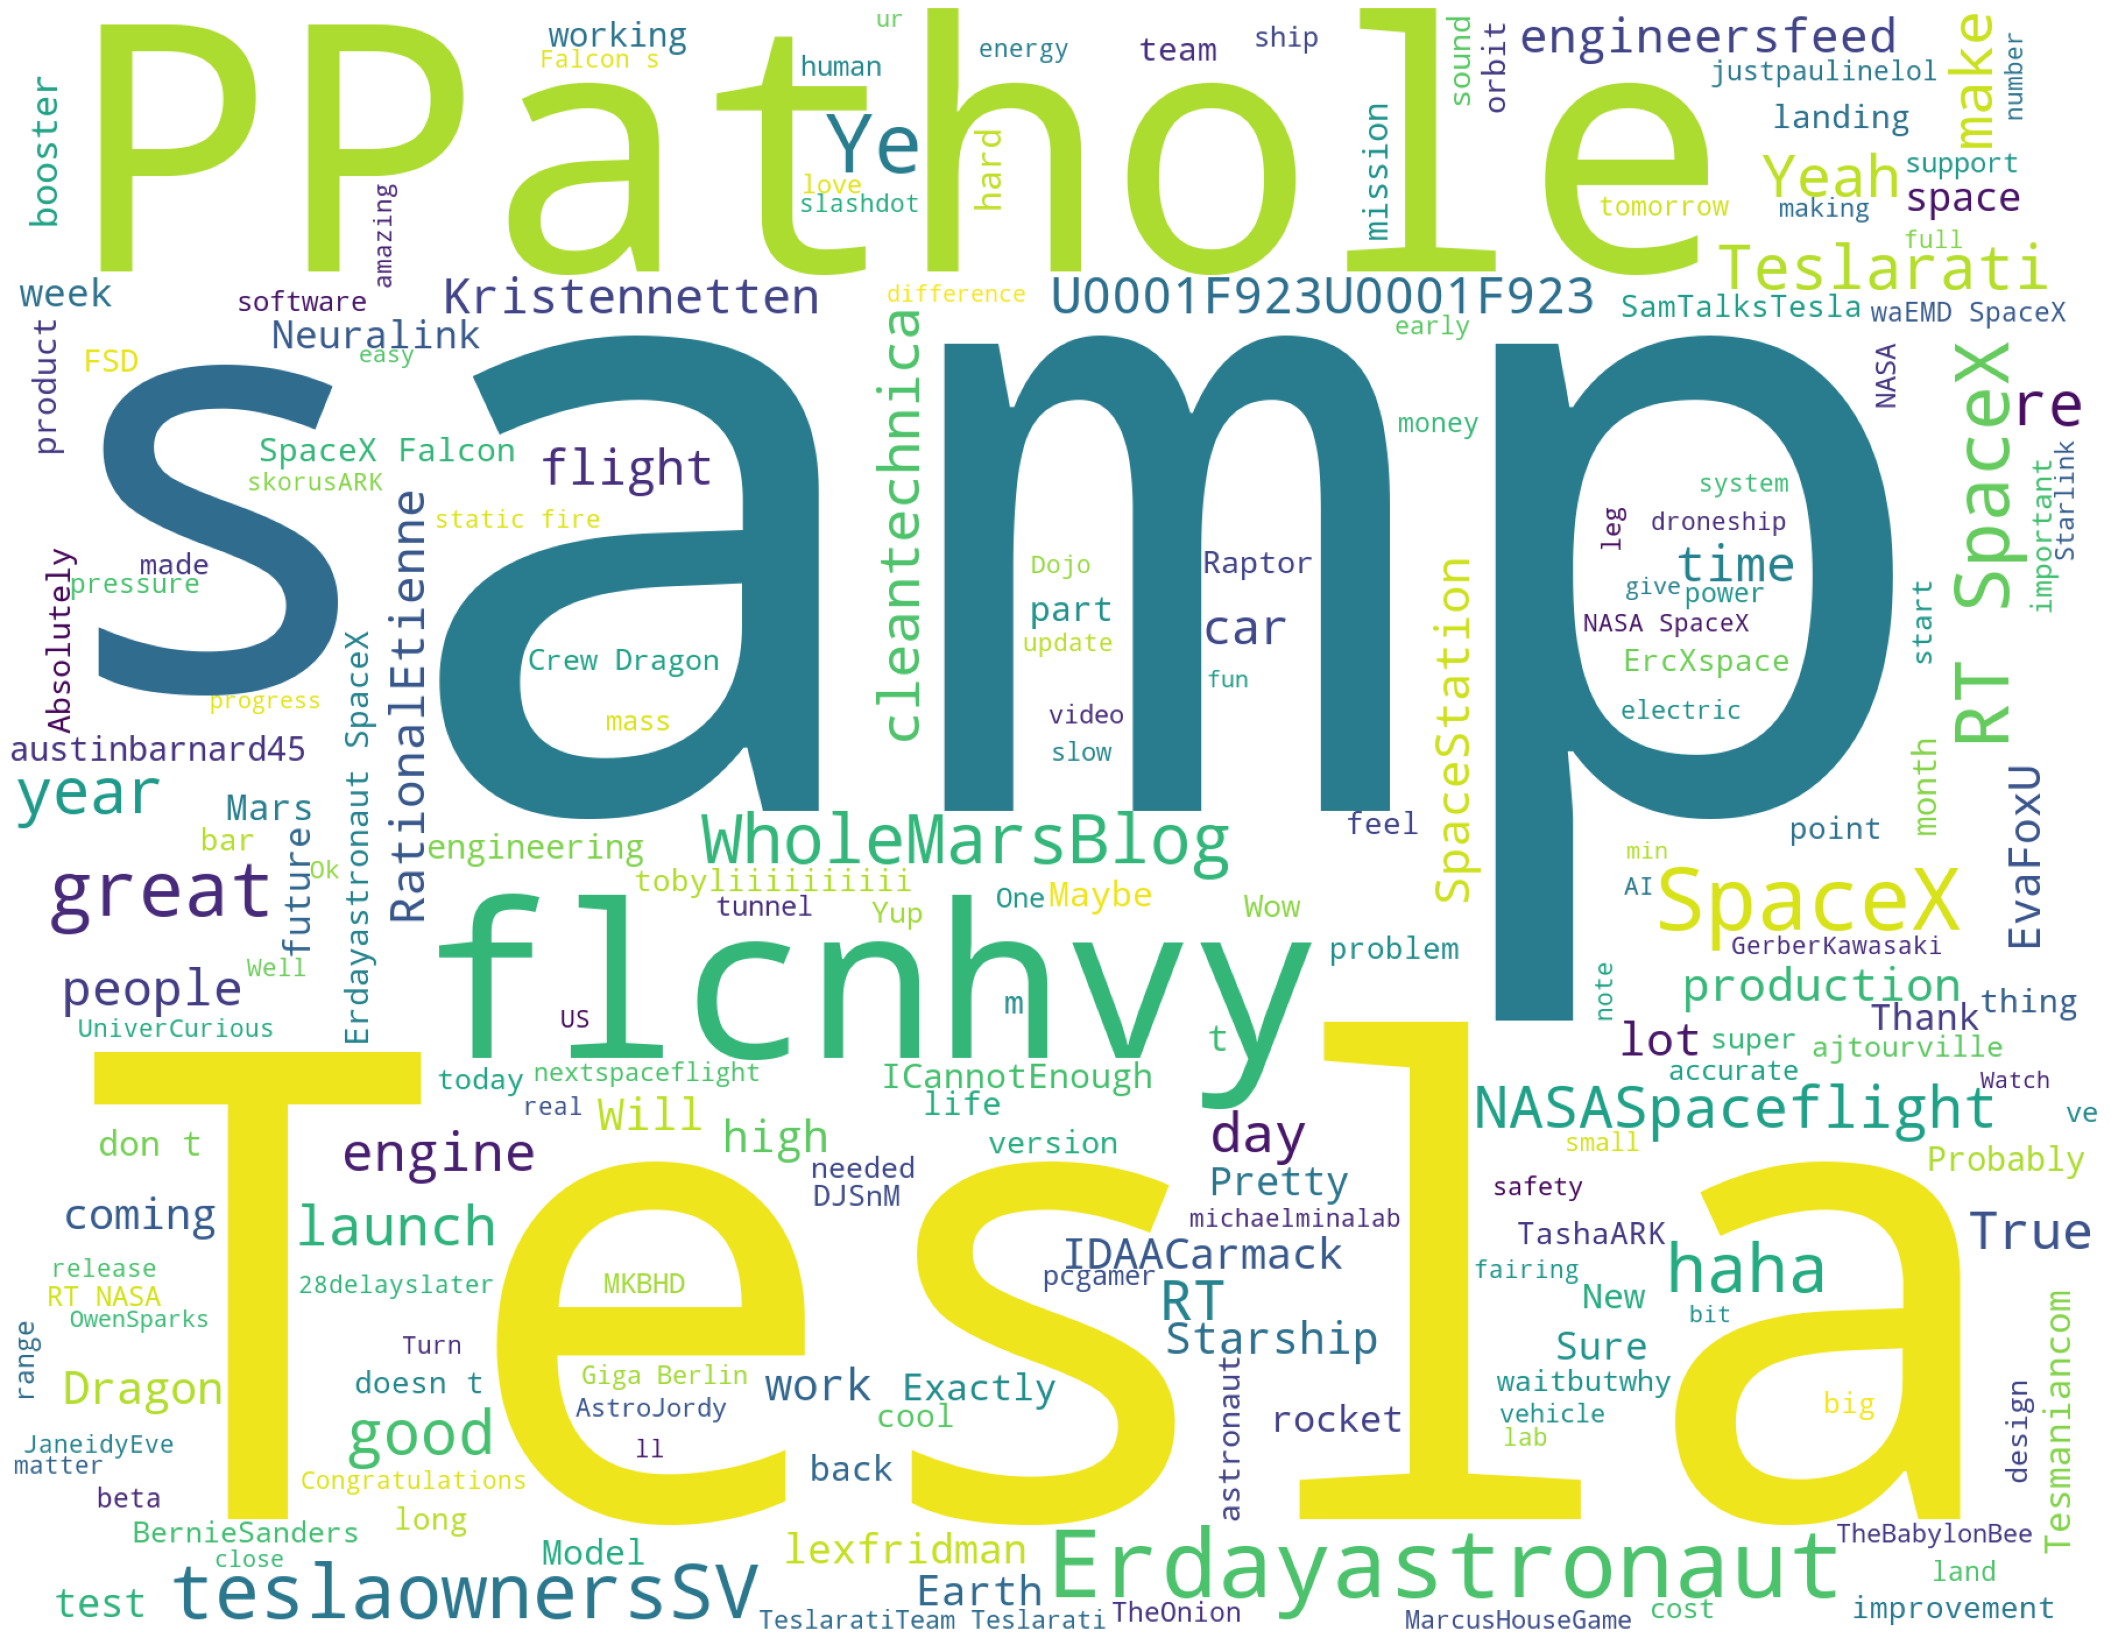

In [80]:
wordcloud = plot_cloud(wordcloud_MB)

In [81]:
#positive word wordcloud
with open("C:\\Users\\Admin\\Downloads\\positive-words.txt","r") as positive:
      positivewords = positive.read().split("\n")

In [82]:
positivew = positivewords[35:]


In [83]:
MBpositive = " ".join ([word for word in no_stop_tokens if word in positivew])

In [85]:
MBpositivecloud = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(MBpositive)

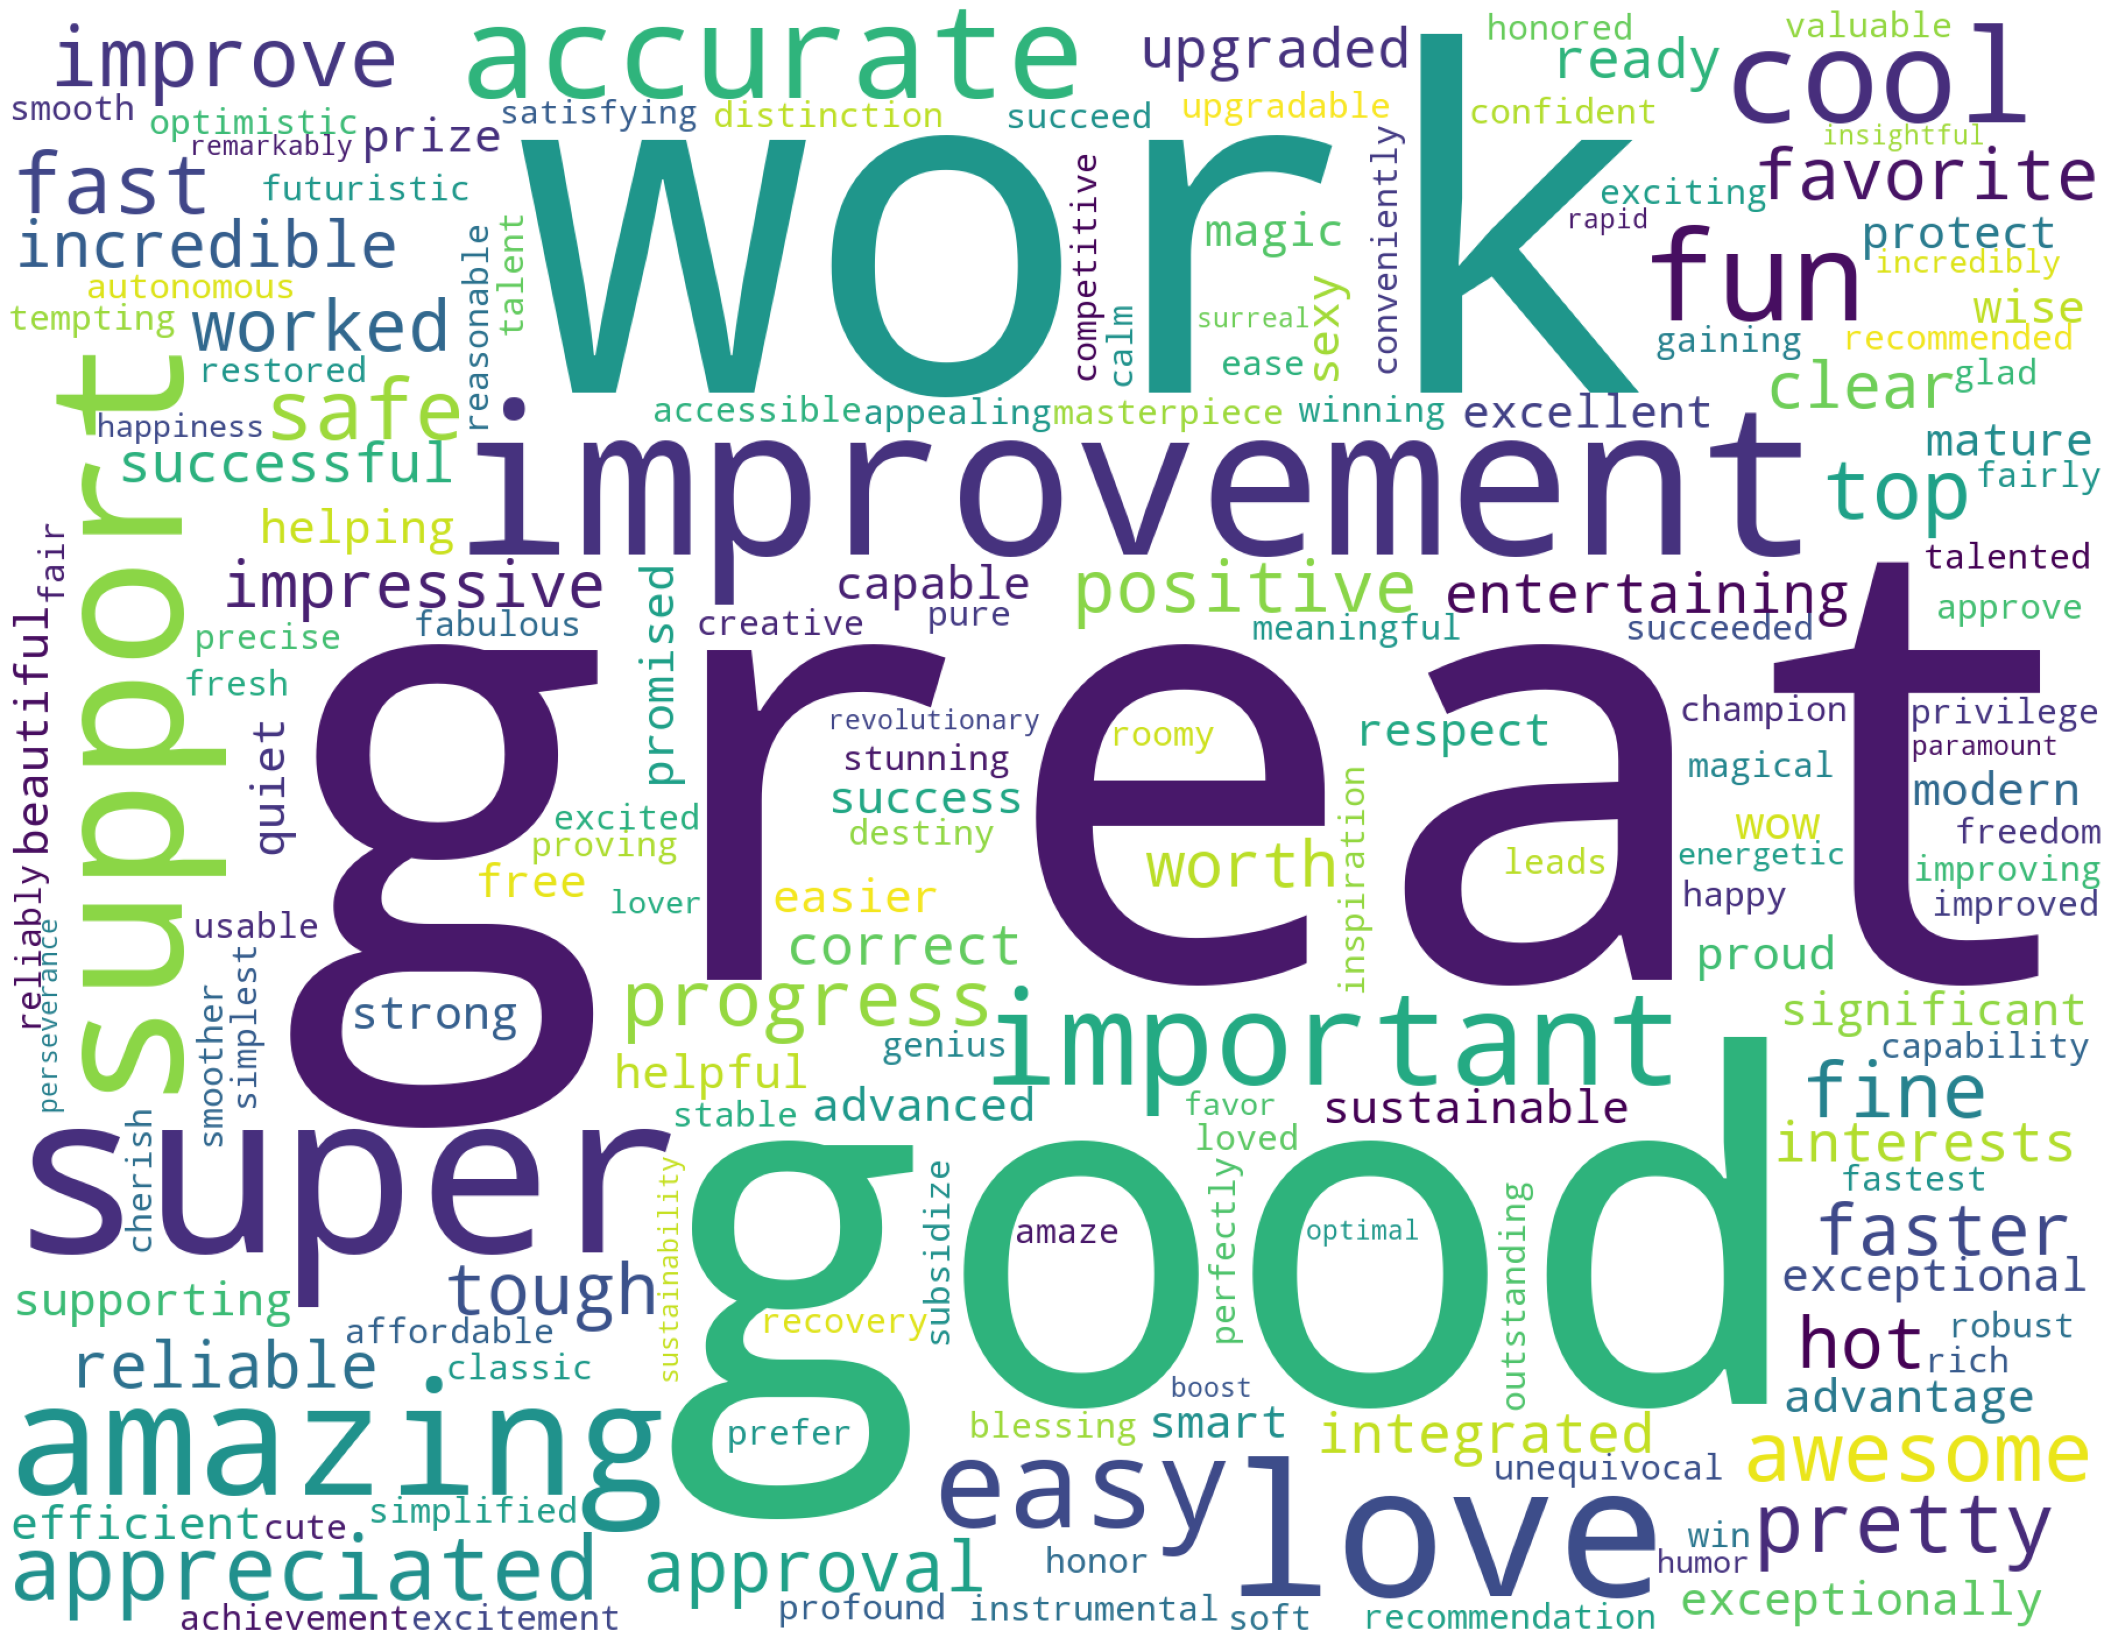

In [86]:
wordcloud = plot_cloud(MBpositivecloud)

In [87]:
#neagtive word wordcloud
with open("C:\\Users\\Admin\\Downloads\\negative-words.txt","r") as negative:
    negativewords = negative.read().split("\n")
    negativewords = negativewords[35:]

In [88]:
MBnegative = " ".join ([word for word in no_stop_tokens if word in negativewords])


In [89]:
MBnegativecloud = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(MBnegative)


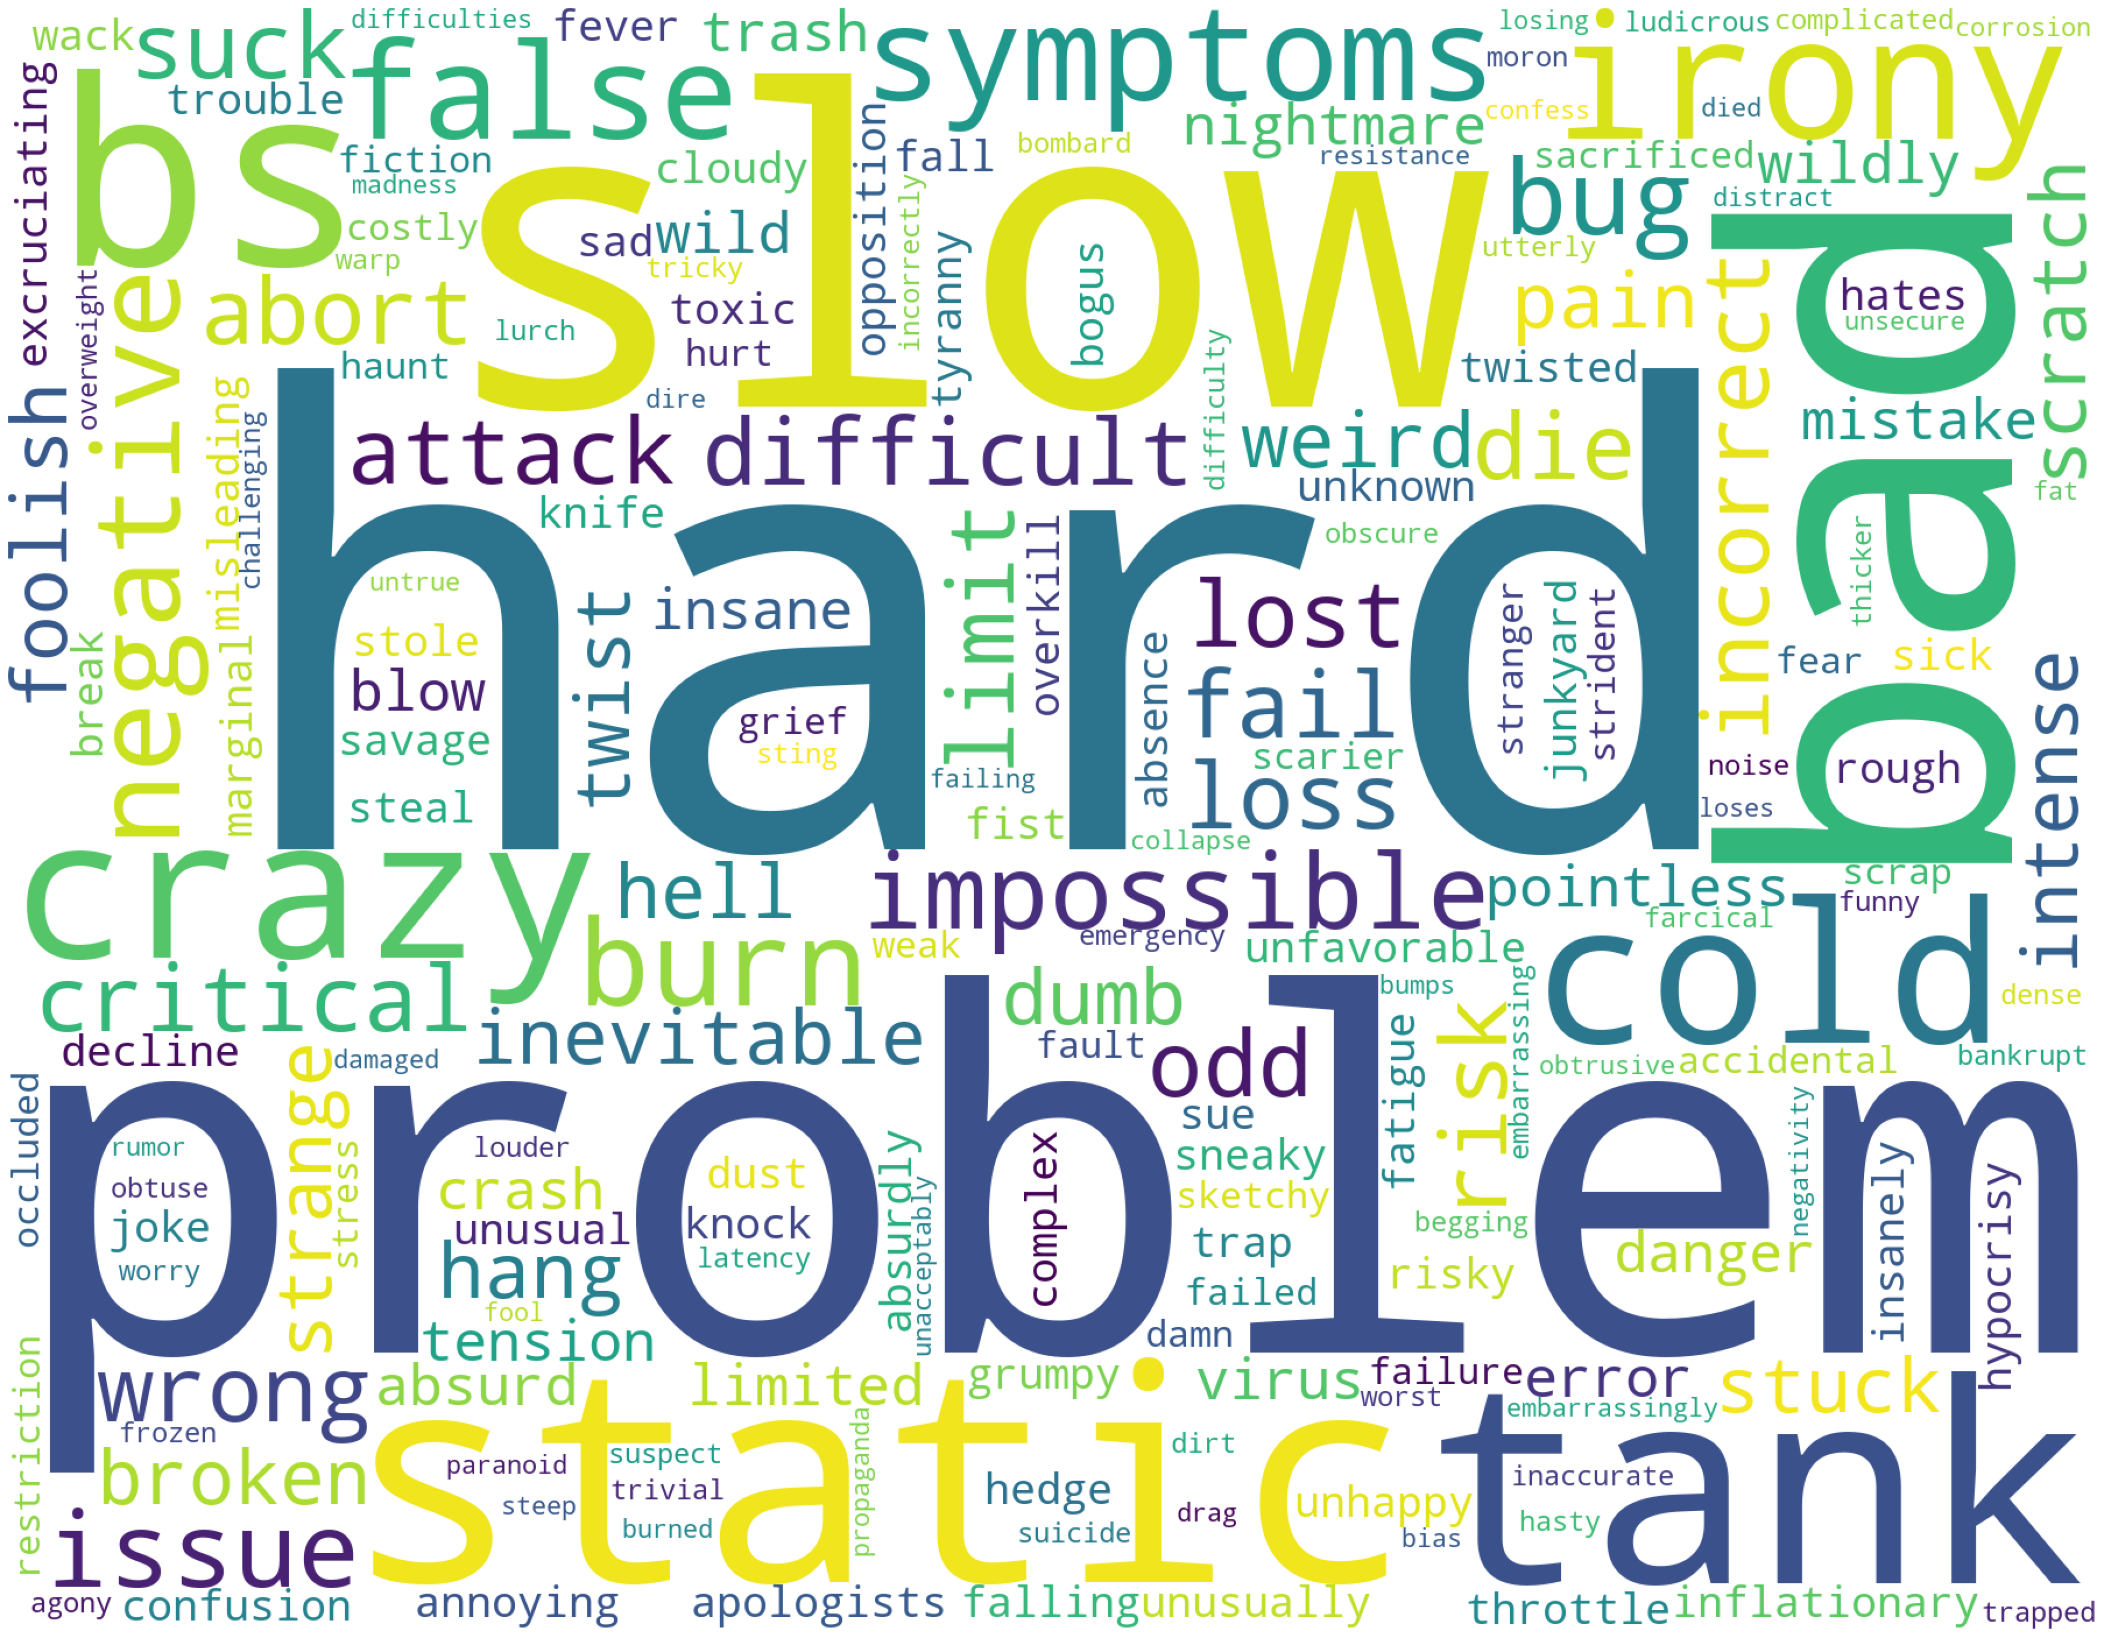

In [90]:
wordcloud = plot_cloud(MBnegativecloud)